In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Ejercicio de regresión para entregar

In [2]:
# Leemos el dataset
wine_df = pd.read_csv("winequality-red.csv")

Vamos realizando los diferentes puntos pedidos en el ejercicio.

1. Lea el dataset como un DataFrame de Pandas. Realice un estudio de variables. Como se llaman y que están midiendo exactamente (vea la documentación del dataset). Además, analice que tipo de variables (incluido el target) son, cuál es el rango de estas variables y cómo se distribuyen (histograma). Además, realice una matriz de correlación, ¿cuáles variables parecen estar correlacionadas? y con respectos a la calidad del vino?

Vemos las primeras cinco filas del dataset

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Tal como podemos ver en [Modeling wine preferences by data mining from physicochemical properties By P. Cortez, A. Cerdeira, Fernando Almeida, Telmo Matos, J. Reis. 2009. Published in Decision Support Systems](https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub).

Los atributos del dataset son:
- `fixed acidity`: Corresponde al conjunto de ácidos orgánicos de baja volatilidad como el ácido málico, láctico, tartárico o cítrico y es inherente a las características de la muestra. Está medido en g/dm3.
- `volatile acidity`: Corresponde al conjunto de ácidos orgánicos de cadena corta que pueden extraerse de la muestra mediante un proceso de destilación: ácido fórmico, ácido acético, ácido propiónico y ácido butírico. Está medido en g/dm3.
- `citric acid`: Es un ácido orgánico débil, que a menudo se usa como conservante o aditivo natural en alimentos o bebidas para agregar un sabor amargo a los alimentos. Está medido en g/dm3.
- `residual sugar`: Proviene de los azúcares naturales de la uva que quedan en un vino una vez finalizada la fermentación alcohólica. Se mide en gramos por litro. Está medido en g/dm3.
- `chlorides`: Pueden dar al vino un sabor salado que puede atraer a los consumidores potenciales. Está medido en g/dm3.
- `free sulfur dioxide`: Es un aditivo en la elaboración del vino, que agrega propiedades de antioxidante y conservación. Está medido en mg/dm3.
- `total sulfur dioxide`: Es la medida de masa divido por volumen. Está medido en g/cm3.
- `pH`: Es una escala utilizada para especificar la acidez o basicidad de una solución acuosa.
- `sulphates`: Son compuestos naturales que se encuentran en todos los vinos. Actúan como conservante al inhibir el crecimiento microbiano. Está medido en g/dm3.
- `alcohol`: El contenido de alcohol del vino varía según el tipo y la marca. Saber cuánto alcohol hay en cada botella de vino sirve para estimar el perfil de sabor del vino. Está medido en vol%.

Y la columna a predecir es:
- `quality`: Es la medida de calidad del vino, calculada por al menos tres expertos en una medición ciega. La escala va de 0 (muy malo) a 10 (excelente)

In [17]:
# Veamos una descripción de todas las columnas, que tipo de columna es y si hay datos faltantes
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB




Veamos ahora la distribución de los datos

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Veamos los histogramas de los atributos

[]

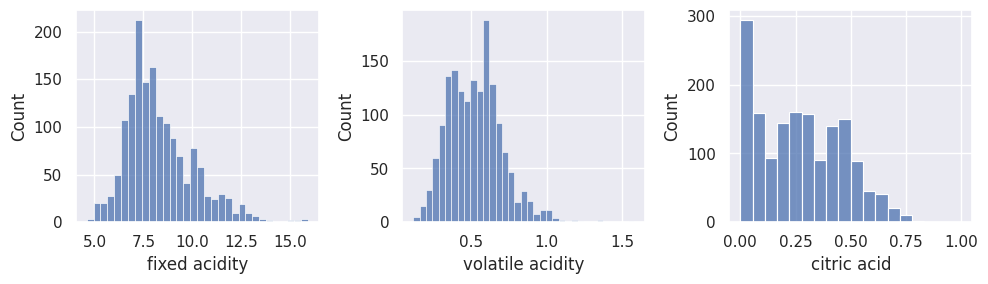

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
sns.histplot(data=wine_df, x="fixed acidity", ax=ax[0])
sns.histplot(data=wine_df, x="volatile acidity", ax=ax[1])
sns.histplot(data=wine_df, x="citric acid", ax=ax[2])
plt.tight_layout()
plt.plot()

[]

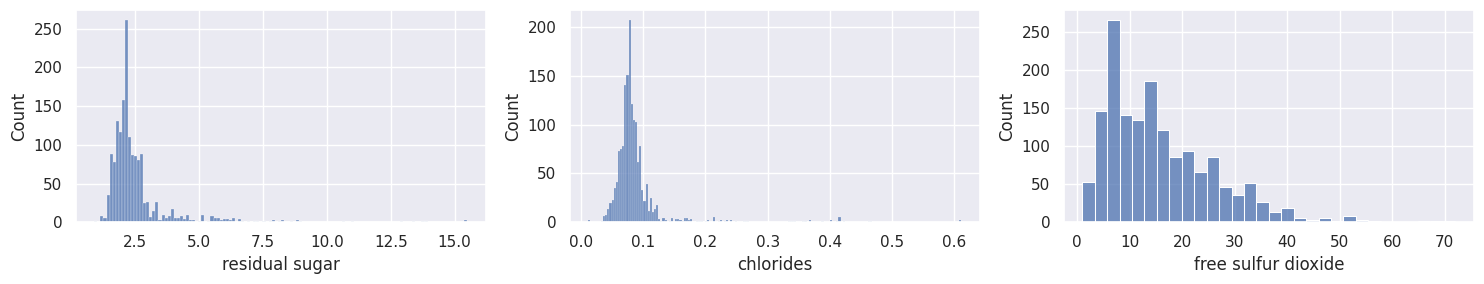

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
sns.histplot(data=wine_df, x="residual sugar", ax=ax[0])
sns.histplot(data=wine_df, x="chlorides", ax=ax[1])
sns.histplot(data=wine_df, x="free sulfur dioxide", ax=ax[2])
plt.tight_layout()
plt.plot()

[]

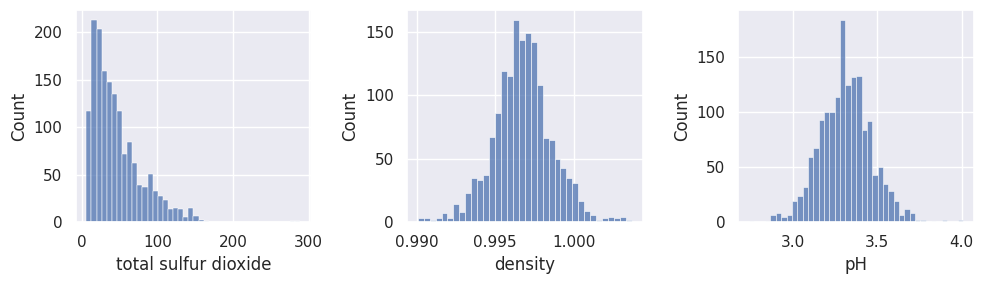

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
sns.histplot(data=wine_df, x="total sulfur dioxide", ax=ax[0])
sns.histplot(data=wine_df, x="density", ax=ax[1])
sns.histplot(data=wine_df, x="pH", ax=ax[2])
plt.tight_layout()
plt.plot()

[]

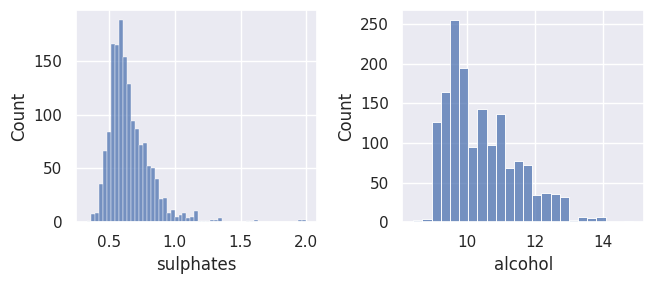

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(6.7, 3))
sns.histplot(data=wine_df, x="sulphates", ax=ax[0])
sns.histplot(data=wine_df, x="alcohol", ax=ax[1])
plt.tight_layout()
plt.plot()

De los histogramas de los atributos, vemos que casi todos los atributos tienen distribuciones de datos en forma de campana. Además los atributos `total sulfur dioxe` y `density` tienen a simple vista valores alejados.

Para determinar si estas distribuciones son distribuciones normales, y hacer un correcto analisis de outliers, deberiamos establecer otro tipo de herramientas estadisticas que tal como test de hipotesis. Esto está por fuera de lo que se ve en el curso.

Veamos la distribución del target:

In [20]:
wine_df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Vemos que los vinos de calidad 5, 6 y 7 son muchos mas comunes.

Armemos la matriz de correlación entre de todas las columnas del dataset:

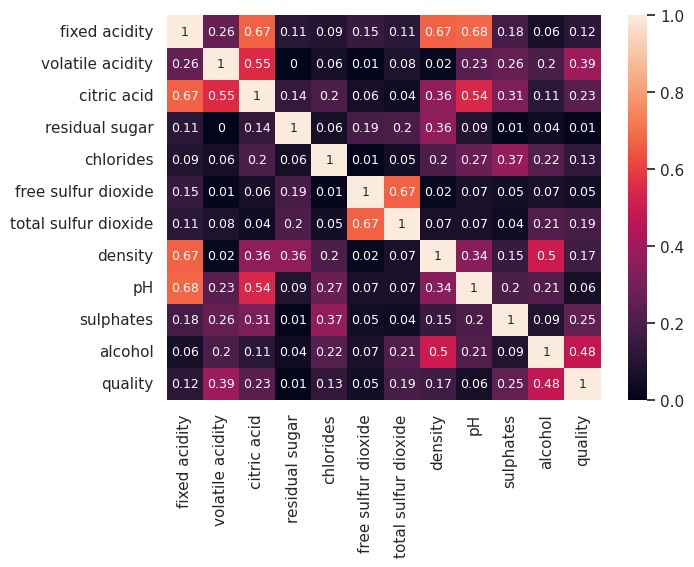

In [21]:
plt.figure(figsize=(7, 5))
sns.heatmap(data=np.abs(wine_df.corr().round(2)), annot=True, annot_kws={"size": 9})
plt.show()

Vemos que con respecto al target los atributos con mayor correlación son:
- `fixed acidity`
- `citruc acid`
- `density`
- `pH`

Y luego vemos que algunos atributos están correlacionados entre si:

- Completar con los que observes.

Recordemos que haya correlación entre atributos no es algo deseable.

2. Realice si es necesario limpieza de datos y corrección de errores.

Este punto se deja a ustedes que los responda despues del punto 1.

----
3. Construya un modelo de regresión lineal simple, el cual se intente predecir la calidad del vino usando el nivel de alcohol.
	1. Realiza la separación entre el dataset de entrenamiento y testeo. Utilice 80%-20%.

In [30]:
# Obtenemos a X e y. Recordar que X debe ser un array de dos dimensiones
X = wine_df[["alcohol"]]
y = wine_df["quality"]

print(f"La forma de X es {X.shape}")
print(f"La forma de y es {y.shape}")

La forma de X es (1599, 1)
La forma de y es (1599,)


In [31]:
# Separamos el dataset en training y test
from sklearn.model_selection import train_test_split

# Como no hay una buena distribucion de valores entre las calidades de vino, usamos el argumento opcional
# para que se mantenga la proporcion en los conjuntos de entrenamiento y testeo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

2. Determine que métrica se va a usar para evaluar la calidad del modelo (MSE, MAE, etc.)

Vamos a usar a MAE

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error

	3. Entrene el modelo con el set de entrenamiento.


In [33]:
# Creamos el modelo
from sklearn.linear_model import LinearRegression
lin_reg_simple = LinearRegression()

# Y lo entrenamos, con el set de entrenamiento
lin_reg_simple.fit(X_train, y_train)

LinearRegression()

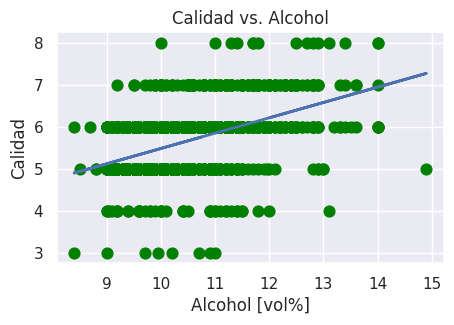

In [34]:
# Esto es extra, veamos graficamente la recta:
plt.figure(figsize=(5, 3))
plt.title('Calidad vs. Alcohol')
plt.xlabel('Alcohol [vol%]')
plt.ylabel('Calidad')

plt.scatter(X_train, y_train, color='green', marker="o", s=60)
plt.plot(X_train, lin_reg_simple.predict(X_train), color="b", linewidth=2)
plt.show()

4. Evalúe el modelo con la métrica de evaluación y el coeficiente de Pearson.

In [35]:
# Obtenemos la prediccion del modelo
y_pred = lin_reg_simple.predict(X_test)

r2score_simple = r2_score(y_test,y_pred)
mae_simple = mean_absolute_error(y_test, y_pred)

print(f"El coeficiente de Pearson del set de testeo es: {r2score_simple}")
print(f"El error absoluto medio es: {mae_simple}")

El coeficiente de Pearson del set de testeo es: 0.2070421320468614
El error absoluto medio es: 0.5792346199169991


4. Construya un modelo de regresión lineal múltiple, usando todos los atributos
	1. Realiza la separación entre el dataset de entrenamiento y testeo. Utilice 80%-20%.

In [38]:
# Obtenemos a X e y. Si usamos drop podemos eliminar filas y columnas, para el caso de todos los atributos, podemos eliminar
# la columna correspondiente al target
X = wine_df.drop(columns="quality")
y = wine_df["quality"]

print(f"La forma de X es {X.shape}")
print(f"La forma de y es {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

La forma de X es (1599, 11)
La forma de y es (1599,)


2. Determine que métrica se va a usar para evaluar la calidad del modelo (MSE, MAE, etc.)

Se usa el mismo que el caso anterior, asi podemos comparar.

3. Entrene el modelo con el set de entrenamiento.

In [39]:
# Creamos el modelo
lin_reg_multiple = LinearRegression()

# Y lo entrenamos, con el set de entrenamiento
lin_reg_multiple.fit(X_train, y_train)

LinearRegression()

4. Evalúe el modelo con la métrica de evaluación y el coeficiente de Pearson.

In [40]:
# Obtenemos la prediccion del modelo
y_pred = lin_reg_multiple.predict(X_test)


r2score_simple = r2_score(y_test,y_pred)
mae_simple = mean_absolute_error(y_test, y_pred)

print(f"El coeficiente de Pearson del set de testeo es: {r2score_simple}")
print(f"El error absoluto medio es: {mae_simple}")

El coeficiente de Pearson del set de testeo es: 0.3702504549078953
El error absoluto medio es: 0.4951190321702554


5. En función de los resultados obtenidos, discuta los modelos, y que tan bien explican la calidad del vino.

Se muestra que hay una correlacion positiva devil entre el nivel de alcohol y la calidad del vino.

Tiene una correlacion positiva moderada, que tiene una relacion mas fuerte entre todas las variables y la calidad del vino